## Momemtum Trading Strategies

#### Option 1: Buy every time it goes down, sell every time it goes up
- Need to set up a websocket stream (DONE)
- Find the volitility of the top 20 cryptos
- When to buy
    - Up 4% from previous day's close
    - MACD is positive and increasing
    - High volume

- When to sell
    - MACD is no longer positive
    - 

# Big question to answer: How do I follow trend?

## Resource: Trend Following - Michael Covel

- Time series momentum (trend following) vs cross-sectional momentum (relative strength)
    - Trend following is probably better
- Fundamental vs technical analysis
    - Fundamental: External factors that affect the supple and demand. By monitoring all fundamentals you can predict the direction of a stock
    - Technical analysis: Two forms based on whether you predict or react
        - Don't predict
        - REACT. The better approach is to first identify the current market trends. Wait patiently for the right conditions, sometimes trades might not happen in a day
- Discretionary vs Systematic
    - Don't let personal (gut) feelings dictate what you do. Make sure everything you do is systematic, consistent. Make the rules, then stick to them.
    - 
    
    
- Absolute Returns: Achieve in all market conditions. No need to benchmark? 
- Volatility
    - High volatility doesn't necessarily mean higher risk. Don't use standard deviation as a risk measure as it measures volatility, not risk. 
    - Semi-variance is a better risk measure (Only looking at variance when the price is going below the mean)
- Drawdowns
    - Difference in time between the highs
    - Drawdowns are a natural ebb and flow of trading
- Correlation
    - Linear relationship between two random variables
- Zero sum
    - 

- Sharpe ratio: Return of an investment based on its risk. Not great for evaluating trend following metrics (as volatility is more common on the up side of trend following)




# Basic Trend following algorithms

## **Research Paper: Trend Following Algorithms for Technical Trading in Stock Market by Fong, Tai, Si**

Two rules of their model: P and Q

- P: The amount of trend in an upward direction for the trade to be opened (when to enter the market)
- Q: The amount of opposite trend after a pivotal turn that will cause an opened position to close. (When to exit the trade)

Open when t > P, close when t < Q. **Price(t)**

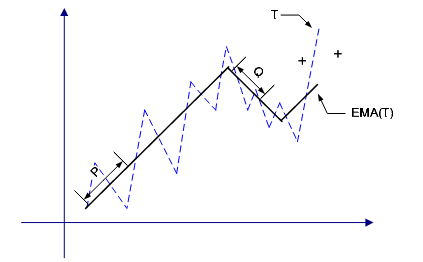

$$ EMA_t = (price_t - EMA_{t-1} \times \frac{2}{n+1}) + EMA_{t-1}  $$
- price(t) is the current price at time t
- n is the number of periods (by aggregation type) for intra-day tradings
- t is any given market time


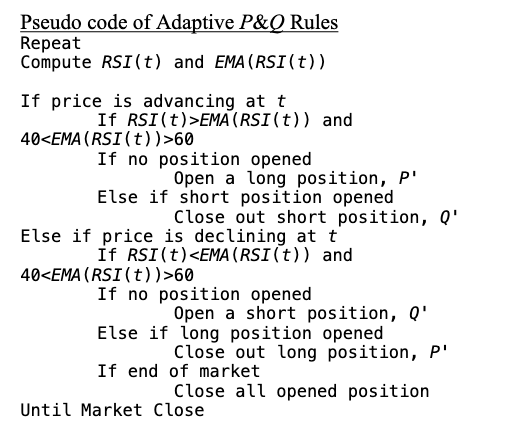


Need to derive P and Q empirically. Use cross validation and allow them to dynamically change.

How do you find the buying and selling positions in real-time if P and Q change? Use the Relative Strength Index (RSI)

$$ RSI_t = 100 - \frac{100}{1+RS_{t}} $$

$$ RS_t = \frac{AU_t}{AD_t} $$

$$ AU_t = \frac{Up_t + Up_{(t-1)} + ... + Up_{(t - n + 1)}}{n} $$

$$ AD_t = \frac{Down_t + Down_{(t-1)} + ... + Down_{(t - n + 1)}}{n} $$

AD is the average price upwards, AD is the average price downwards and n is the number of RSI periods. Typically 14 but used cross-validation

**RSI**
- Scale of 0 to 100. If it approaches 70, the asset may be overvalued and is a good time to pullback
- If it approaches 30, likely to be oversold and may be undervalued
- Above 50 = bullish, below 50 = bearish. Below 30 is a bearish danger zone

**How does a position open under this algorithm?**
- For a long position:
    - Price is advancing
    - RSI(t) is greater than EMA(RSI(t))
    - EMA(RSI(t)) is less than 40 or greater than 60
- For a short position:
    - Price is declining
    - RSI(t) is less than EMA(RSI(t))
    - EMA(RSI(t)) is less than 40 or greater than 60
    
**This model could be bad in assets with high volatility. When fluctuation goes about 45%, pull out**

$$ Fluctuate_t = (COS_e \times C \times R_t) + B $$

# Econometric Trend following algorithms

## Time-Series Momentum Strategy
Performance of the own specific security. Typically trend-following algs look at the look-back period and find some sort of trading signal. There's no econometric model. 


## Cross-sectional momentum Strategy
This looks at performance relative to a group of peers

## Dynamic Classifier 

## Dynamic Portfolio Allocation


In [2]:
import pandas as pd
import re
import numpy as np
import plotly.express as px
import datetime
import os, sys
import sqlite3
import websocket
sys.path.append(os.path.abspath('../'))
from helper_funcs import get_data, convert_epoch_to_datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC, SVR

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE

import time
import json
import hmac
import hashlib
import requests
from urllib.parse import urljoin, urlencode

from binance import ThreadedWebsocketManager as twm

In [3]:
API_KEY = os.environ.get('BINANCE_API_KEY_STAGING')   
SECRET_KEY = os.environ.get('BINANCE_SECRET_KEY_STAGING')

BASE_URL = "wss://stream.binance.com:9443"
PATH = '/ws/btcusdt@kline_1m'
socket = urljoin(BASE_URL, PATH)

In [8]:
def on_message(ws, message):
    json_message = json.loads(message)
    candle = json_message['k']
    is_candle_closed = candle['x']
    close = candle['c']
    high = candle['h']
    low = candle['l']
    vol = candle['v']
    
    print(close, high, low, vol)
#     if is_candle_closed:
#         closes.append(float(close))
#         highs.append(float(high))
#         lows.append(float(high))
        
    
def on_close(ws):
    print("Closed")

ws = websocket.WebSocketApp(socket, on_message=on_message, on_close=on_close)

In [9]:
ws.run_forever()

33348.39000000 33371.04000000 33299.99000000 1034.63054000
33359.67000000 33371.04000000 33299.99000000 1060.65183000
33354.93000000 33377.91000000 33299.99000000 1082.14702000
33349.17000000 33377.91000000 33299.99000000 1100.33227000
33344.35000000 33377.91000000 33299.99000000 1119.03261000
33346.62000000 33377.91000000 33299.99000000 1127.25978000
33368.40000000 33377.91000000 33299.99000000 1138.13782000
33370.70000000 33377.91000000 33299.99000000 1156.90554000
33348.73000000 33377.91000000 33299.99000000 1170.60865000
33394.32000000 33394.32000000 33299.99000000 1188.70006000
33369.77000000 33394.32000000 33299.99000000 1209.57638000
33403.62000000 33403.62000000 33299.99000000 1242.03561000
33410.88000000 33414.51000000 33299.99000000 1256.75878000
33423.84000000 33431.26000000 33299.99000000 1273.88163000
33434.14000000 33446.15000000 33423.83000000 12.21007000
33466.00000000 33466.00000000 33423.83000000 23.38337000
33456.24000000 33474.53000000 33423.83000000 41.20671000
334

False

In [5]:
# r = requests.get(url, headers=headers, params=params)
# if r.status_code == 200:
#     print(json.dumps(r.json(), indent=2))
# else:
#     raise BinanceException(status_code=r.status_code, data=r.json())